In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
# Load the datasets
train_data = pd.read_csv(r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 1\train.csv")
test_data = pd.read_csv(r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 1\test.csv")
sample_submission = pd.read_csv(r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 1\sample_submission.csv")

# Display basic information about the datasets
print("Training data shape:", train_data.shape)
print("\nFirst few rows of training data:")
print(train_data.head())

print("\n" + "="*50)
print("Test data shape:", test_data.shape)
print("\nFirst few rows of test data:")
print(test_data.head())

print("\n" + "="*50)
print("Sample submission shape:", sample_submission.shape)
print("\nSample submission format:")
print(sample_submission.head())

Training data shape: (1460, 81)

First few rows of training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  

In [3]:
# Display all column names to identify relevant features
print("All columns in the dataset:")
print(train_data.columns.tolist())

print("\n" + "="*50)

# Look for columns related to our features
print("Looking for relevant columns:")
print("\nColumns that might contain square footage:")
square_ft_cols = [col for col in train_data.columns if 'SF' in col or 'Area' in col]
print(square_ft_cols)

print("\nColumns that might contain bedroom info:")
bedroom_cols = [col for col in train_data.columns if 'Bedroom' in col or 'Room' in col]
print(bedroom_cols)

print("\nColumns that might contain bathroom info:")
bathroom_cols = [col for col in train_data.columns if 'Bath' in col or 'bath' in col]
print(bathroom_cols)

print("\nTarget variable (Price):")
print("SalePrice" in train_data.columns)

All columns in the dataset:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [4]:
# Select our features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Create total bathrooms (FullBath + 0.5 * HalfBath)
train_data['TotalBathrooms'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']

# Examine our selected features
print("Selected features summary:")
print(train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']].describe())

print("\n" + "="*50)
print("Check for missing values:")
print(train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']].isnull().sum())

print("\n" + "="*50)
print("Sample of our data:")
print(train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']].head(10))

Selected features summary:
         GrLivArea  BedroomAbvGr  TotalBathrooms      SalePrice
count  1460.000000   1460.000000     1460.000000    1460.000000
mean   1515.463699      2.866438        1.756507  180921.195890
std     525.480383      0.815778        0.636015   79442.502883
min     334.000000      0.000000        0.000000   34900.000000
25%    1129.500000      2.000000        1.000000  129975.000000
50%    1464.000000      3.000000        2.000000  163000.000000
75%    1776.750000      3.000000        2.500000  214000.000000
max    5642.000000      8.000000        3.500000  755000.000000

Check for missing values:
GrLivArea         0
BedroomAbvGr      0
TotalBathrooms    0
SalePrice         0
dtype: int64

Sample of our data:
   GrLivArea  BedroomAbvGr  TotalBathrooms  SalePrice
0       1710             3             2.5     208500
1       1262             3             2.0     181500
2       1786             3             2.5     223500
3       1717             3             1

In [5]:
# Prepare our feature matrix (X) and target vector (y)
X = train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y = train_data['SalePrice']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("\nFeature names:")
print("X columns:", X.columns.tolist())

print("\nTraining data sample:")
print("X_train (first 5 rows):")
print(X_train.head())
print("\ny_train (first 5 values):")
print(y_train.head())

Data split completed!
Training set size: 1168 samples
Testing set size: 292 samples

Feature names:
X columns: ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']

Training data sample:
X_train (first 5 rows):
      GrLivArea  BedroomAbvGr  TotalBathrooms
254        1314             3             1.0
1066       1571             3             2.5
638         796             2             1.0
799        1768             3             1.5
380        1691             3             2.0

y_train (first 5 values):
254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64


In [6]:
# Create and train the linear regression model
model = LinearRegression()

# Fit the model to our training data
model.fit(X_train, y_train)

print("Linear Regression Model Trained Successfully!")

print("\nModel Parameters:")
print("Intercept (β₀):", round(model.intercept_, 2))
print("\nCoefficients (β₁, β₂, β₃):")
for i, feature in enumerate(X.columns):
    print(f"  {feature}: {round(model.coef_[i], 2)}")

print("\nModel equation:")
print(f"SalePrice = {round(model.intercept_, 2)} + {round(model.coef_[0], 2)} * GrLivArea + {round(model.coef_[1], 2)} * BedroomAbvGr + {round(model.coef_[2], 2)} * TotalBathrooms")

Linear Regression Model Trained Successfully!

Model Parameters:
Intercept (β₀): 56862.58

Coefficients (β₁, β₂, β₃):
  GrLivArea: 100.64
  BedroomAbvGr: -26645.53
  TotalBathrooms: 27083.21

Model equation:
SalePrice = 56862.58 + 100.64 * GrLivArea + -26645.53 * BedroomAbvGr + 27083.21 * TotalBathrooms


In [7]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print("="*40)
print(f"Training Set:")
print(f"  Mean Squared Error: {train_mse:,.2f}")
print(f"  Root Mean Squared Error: {np.sqrt(train_mse):,.2f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  Mean Squared Error: {test_mse:,.2f}")
print(f"  Root Mean Squared Error: {np.sqrt(test_mse):,.2f}")
print(f"  R² Score: {test_r2:.4f}")

print(f"\nSample Predictions vs Actual (first 10 test samples):")
comparison = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred[:10],
    'Difference': y_test.iloc[:10].values - y_test_pred[:10]
})
print(comparison)


Model Performance:
Training Set:
  Mean Squared Error: 2,610,488,336.40
  Root Mean Squared Error: 51,092.94
  R² Score: 0.5623

Test Set:
  Mean Squared Error: 2,848,523,443.42
  Root Mean Squared Error: 53,371.56
  R² Score: 0.6286

Sample Predictions vs Actual (first 10 test samples):
   Actual      Predicted    Difference
0  154500  111489.391806  43010.608194
1  325000  308503.938593  16496.061407
2  115000  134109.448513 -19109.448513
3  159000  198552.189088 -39552.189088
4  315500  220769.698213  94730.301787
5   75500  120701.496720 -45201.496720
6  311500  214195.284854  97304.715146
7  146000  191161.318732 -45161.318732
8   84500  120701.496720 -36201.496720
9  135500  157737.986619 -22237.986619


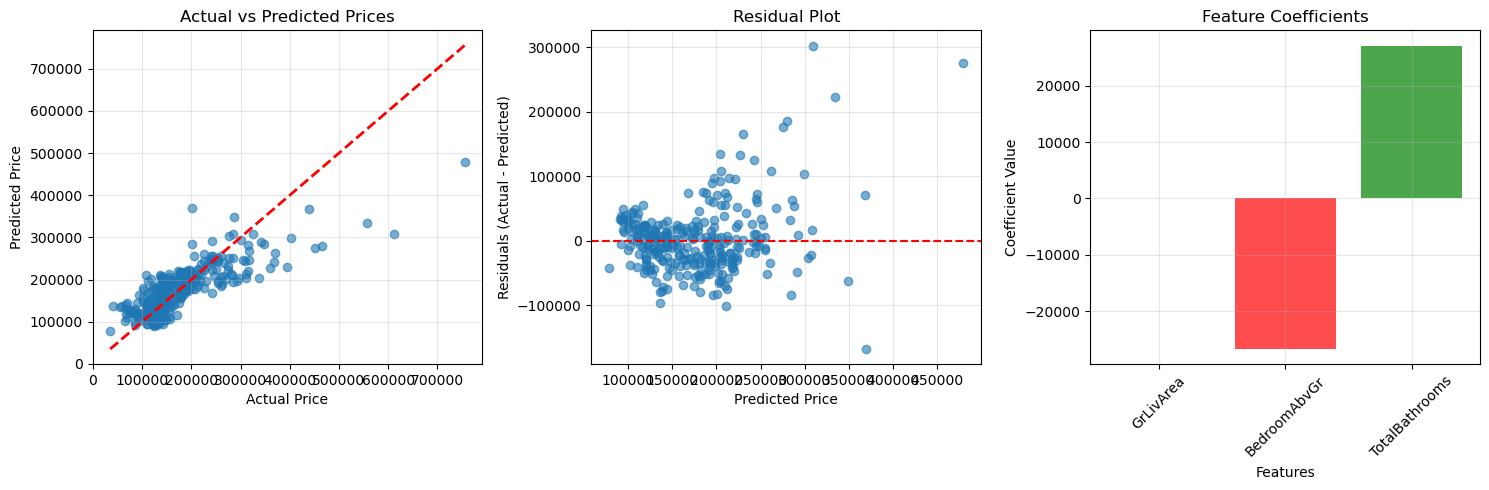

Visualizations created!


In [8]:
# Create visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted prices
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (prediction errors)
plt.subplot(1, 3, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Feature importance (coefficients)
plt.subplot(1, 3, 3)
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
coefficients = model.coef_
colors = ['green' if coef > 0 else 'red' for coef in coefficients]
plt.bar(features, coefficients, color=colors, alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualizations created!")

In [9]:
# Prepare the test data (same preprocessing as training data)
test_data['TotalBathrooms'] = test_data['FullBath'] + 0.5 * test_data['HalfBath']

# Select the same features we used for training
X_test_final = test_data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]

# Check for any missing values in test data
print("Missing values in test data:")
print(X_test_final.isnull().sum())

# Make predictions on the test set
test_predictions = model.predict(X_test_final)

# Prepare submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

print("Test predictions completed!")
print("Sample predictions:")
print(submission.head(10))

# Save the submission file
submission.to_csv(r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 1\house_price_predictions.csv", index=False)
print("\nPredictions saved to 'house_price_predictions.csv'")

Missing values in test data:
GrLivArea         0
BedroomAbvGr      0
TotalBathrooms    0
dtype: int64
Test predictions completed!
Sample predictions:
     Id      SalePrice
0  1461  120825.378340
1  1462  151297.225323
2  1463  208571.501610
3  1464  206055.579229
4  1465  186553.153828
5  1466  211188.060887
6  1467  150548.390054
7  1468  192067.050790
8  1469  179150.400582
9  1470  119416.461806

Predictions saved to 'house_price_predictions.csv'
